In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df = df.drop(['petal length (cm)', 'petal width (cm)'], axis = 'columns')
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [8]:
df1 = df[df.target == 1]
df1.head()

,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [9]:
df2 = df[df.target == 2]
df2.head()

,sepal length (cm),sepal width (cm),target
100,6.3,3.3,2
101,5.8,2.7,2
102,7.1,3.0,2
103,6.3,2.9,2
104,6.5,3.0,2


In [10]:
df0 = df[df.target == 0]
df0.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


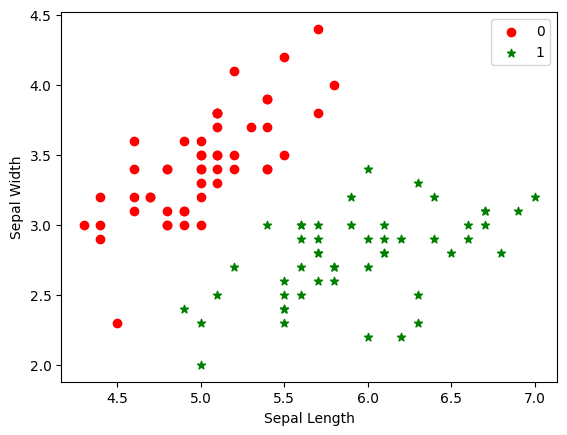

In [12]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', marker='o', label='0')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', marker='*', label='1')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [17]:
X = df[:100]
X.drop('target', axis='columns')
X.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [20]:
y = df.target[:100]

In [21]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [2, 3, 4, 5 ,6, 7, 8, 9, 10]
}, cv=3, return_train_score=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [22]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [23]:
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003077,0.001567,0.004367,0.000548,2,{'n_neighbors': 2},1.0,1.0,1.0,1.0,0.0,1
1,0.003642,0.001195,0.008270,0.002418,3,{'n_neighbors': 3},1.0,1.0,1.0,1.0,0.0,1
2,0.004081,0.000339,0.006241,0.001925,4,{'n_neighbors': 4},1.0,1.0,1.0,1.0,0.0,1
3,0.002254,0.000578,0.004559,0.001301,5,{'n_neighbors': 5},1.0,1.0,1.0,1.0,0.0,1
4,0.001841,0.000121,0.003409,0.000211,6,{'n_neighbors': 6},1.0,1.0,1.0,1.0,0.0,1
5,0.001693,0.000025,0.003255,0.000010,7,{'n_neighbors': 7},1.0,1.0,1.0,1.0,0.0,1
6,0.001671,0.000021,0.003213,0.000022,8,{'n_neighbors': 8},1.0,1.0,1.0,1.0,0.0,1
7,0.001657,0.000016,0.003273,0.000096,9,{'n_neighbors': 9},1.0,1.0,1.0,1.0,0.0,1
8,0.001701,0.000042,0.003257,0.000030,10,{'n_neighbors': 10},1.0,1.0,1.0,1.0,0.0,1


In [25]:
result = result[['param_n_neighbors', 'params', 'mean_test_score']]
result.head()

,param_n_neighbors,params,mean_test_score
0,2,{'n_neighbors': 2},1.0
1,3,{'n_neighbors': 3},1.0
2,4,{'n_neighbors': 4},1.0
3,5,{'n_neighbors': 5},1.0
4,6,{'n_neighbors': 6},1.0


In [26]:
clf.best_score_

np.float64(1.0)

In [27]:
clf.best_params_

{'n_neighbors': 2}

In [29]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

1.0

In [31]:
y_pred = knn_clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0])

In [33]:
dir(y_pred)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [35]:
X_test['predict'] = y_pred
X_test.head()

,sepal length (cm),sepal width (cm),target,predict
49,5.0,3.3,0,0
82,5.8,2.7,1,1
95,5.7,3.0,1,1
64,5.6,2.9,1,1
45,4.8,3.0,0,0


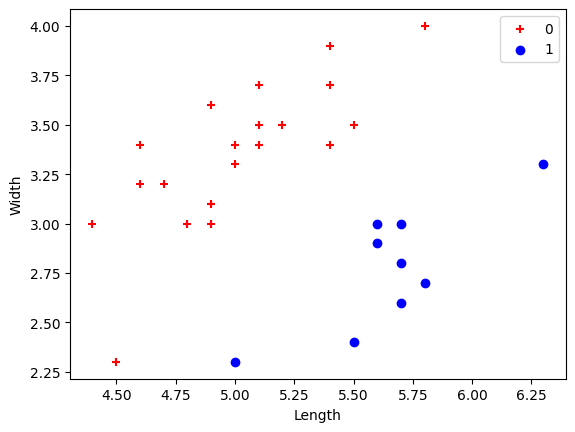

In [36]:
x1 = X_test[X_test.predict == 0]
x2 = X_test[X_test.predict == 1]

plt.scatter(x1['sepal length (cm)'], x1['sepal width (cm)'], color='red', marker='+', label='0')
plt.scatter(x2['sepal length (cm)'], x2['sepal width (cm)'], color='blue', marker='o', label='1')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()